***----------------------------------------------WEEK:3 - TASK 01 [ BREAST-CANCER-PREDICTION ]----------------------------------------------***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Load the dataset using pd.read csv. How many rows and columns are in the dataset?
List the column names.**

In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
cols = [col for col in df.columns]
cols

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


**Identify and handle missing values. How was the Unnamed: 32 column handled?**

Dropped the `Unnamed` columns because they contained only null values, offering no useful information for the model.
Keeping such columns can introduce noise or errors during training and waste memory.



In [ ]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
new_df = df.copy()

new_df.drop(columns=['diagnosis'],inplace=True )

In [ ]:
new_df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


<Axes: xlabel='count', ylabel='diagnosis'>

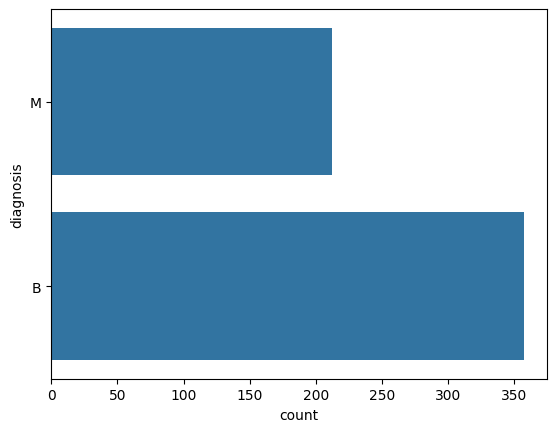

In [ ]:
sns.countplot(df['diagnosis'])

In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


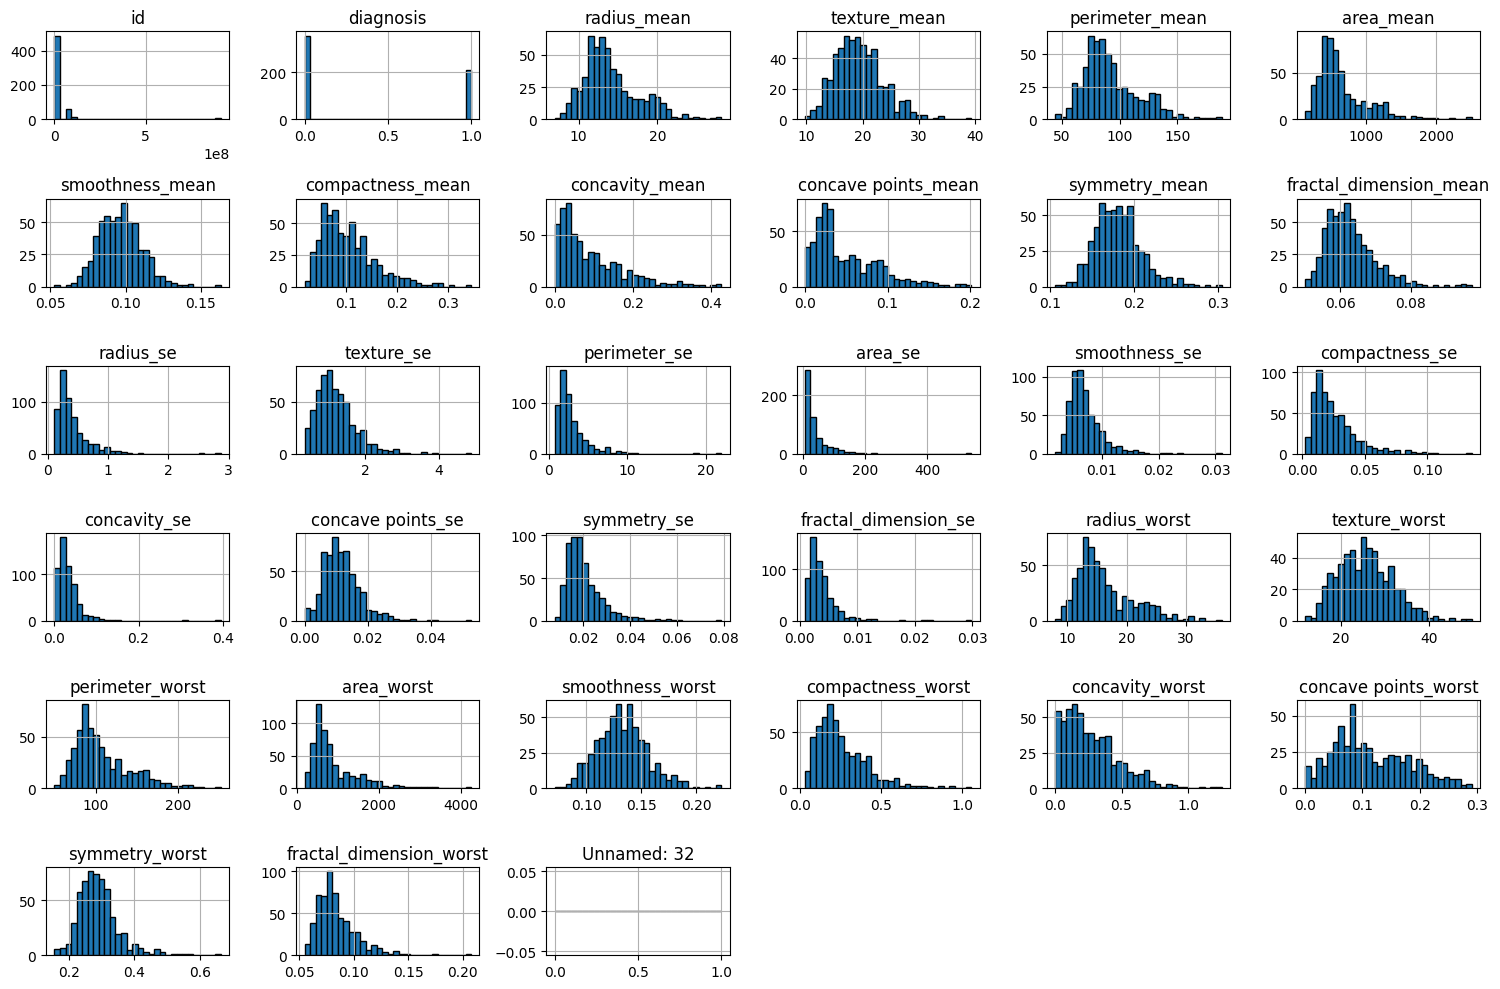

In [ ]:
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

<Axes: ylabel='area_se'>

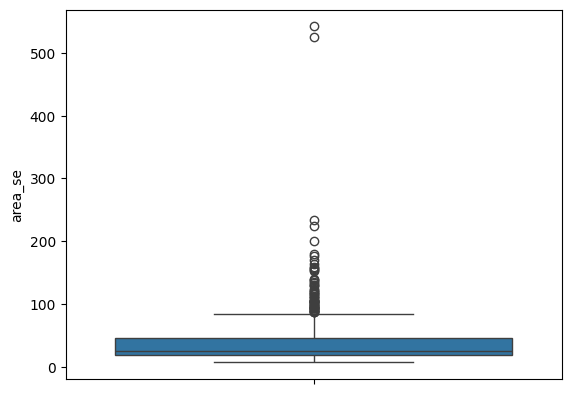

In [ ]:
sns.boxplot(df['area_se'])

In [ ]:
# df['diagnosis'].plot(kind='bar')

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,classification_report,confusion_matrix,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



In [ ]:
X = df.drop(columns=['diagnosis','Unnamed: 32','id'],axis=1)
y = df['diagnosis']

In [ ]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
len(X.columns)

30

In [ ]:
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


**Split the dataset into training (70%) and test (30%) sets. What are the sizes of these sets?**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape


(398, 30)

In [ ]:
X_test.shape

(171, 30)

In [ ]:
y_train.shape

(398,)

In [ ]:
y_test.shape

(171,)

In [ ]:
def plot_confusion_matrix(cm,name):
  plt.figure(figsize=(6,4))
  sns.heatmap(cm , annot=True, fmt='d', cmap='Blues')
  plt.title(f'Confusion Matrix - {name}')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.tight_layout()
  plt.show()


**Apply StandardScaler to numerical features. Why is standardization important for
these models?**

Standardization is important because many models, like KNN, SVM, and Logistic Regression, are sensitive to the scale of features—standardizing ensures each feature contributes equally by centering them around zero with unit variance.



**What are Pipelines?**

Pipelines in machine learning are tools that allow you to chain multiple preprocessing steps and a model into a single, streamlined object.

**Why Are They Used?**

**Automation:** Ensures the same preprocessing is applied during training and prediction.

**Clean Code:** Reduces duplication and organizes code neatly.

**Consistency:** Prevents data leakage by applying transforms only on training data.

**Integration:** Makes it easy to combine steps like scaling, PCA, and modeling into one workflow.

**Cross-validation-ready:** Pipelines work seamlessly with GridSearchCV or cross-validation.

In short: Pipelines help you build robust, reproducible, and clean machine learning workflows.

In [ ]:
pipelines = {
    'logreg': Pipeline([
      ('scaler', StandardScaler()),
      # ('pca', PCA(n_components=0.95)),
      ('clf', LogisticRegression(max_iter=1000))
  ]),
    'rf': Pipeline([
      ('scaler', StandardScaler()),
      ('pca', PCA(n_components=0.95)),
      ('clf', RandomForestClassifier())
  ]),
    'svc': Pipeline([
      ('scaler', StandardScaler()),
      ('pca', PCA(n_components=0.95)),
      ('clf', SVC())
  ]),
    'knn': Pipeline([
      ('scaler', StandardScaler()),
      ('pca', PCA(n_components=0.95)),
      ('clf', KNeighborsClassifier())
  ])
}

**Train Logistic Regression, Decision Tree, Random Forest, and SVC models.**


In [ ]:
import asyncio

async def train_pipeline(pipelines):

  for name, pipeline in pipelines.items():

    await asyncio.to_thread(pipeline.fit,X_train,y_train)

    y_pred = await asyncio.to_thread(pipeline.predict,X_test)

    print(f"\n Model: {name}")
    print("\n Accuracy:", accuracy_score(y_test, y_pred))


    print("\n //////////////////////////////////////////////")
    print(classification_report(y_test, y_pred))


    print("\n //////////////////////////////////////////////")
    print('AUC-SCORE:', roc_auc_score(y_test, y_pred))


    print("\n //////////////////////////////////////////////")
    cm = confusion_matrix(y_test,y_pred)
    print('\n Confusion Matrix \n', cm)

    await asyncio.to_thread(plot_confusion_matrix,cm,name)

**Report their
accuracy scores. Which model performed best, and why?**

**Based on the reported accuracy scores:**

Logistic Regression performed the best with an accuracy of 98.25%

Followed by SVC at 97.66%

Random Forest and KNN both scored 96.49%

**Best Model: Logistic Regression**
It performed best likely because:

The dataset may be linearly separable, favoring Logistic Regression.

Logistic Regression is less prone to overfitting than decision trees and can generalize well with the right preprocessing (like scaling).

Other models (like RF or KNN) may have been more affected by noise or parameter defaults.

Logistic Regression is efficient when the relationship between features and the target is mostly linear and the dataset is well-preprocessed.


 Model: logreg

 Accuracy: 0.9824561403508771

 //////////////////////////////////////////////
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


 //////////////////////////////////////////////
AUC-SCORE: 0.9828042328042329

 //////////////////////////////////////////////

 Confusion Matrix 
 [[106   2]
 [  1  62]]


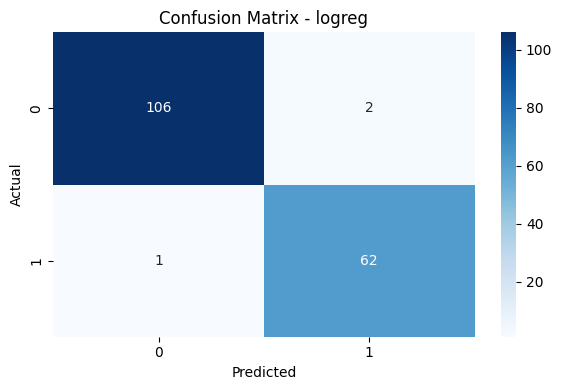


 Model: rf

 Accuracy: 0.9649122807017544

 //////////////////////////////////////////////
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171


 //////////////////////////////////////////////
AUC-SCORE: 0.9656084656084657

 //////////////////////////////////////////////

 Confusion Matrix 
 [[104   4]
 [  2  61]]


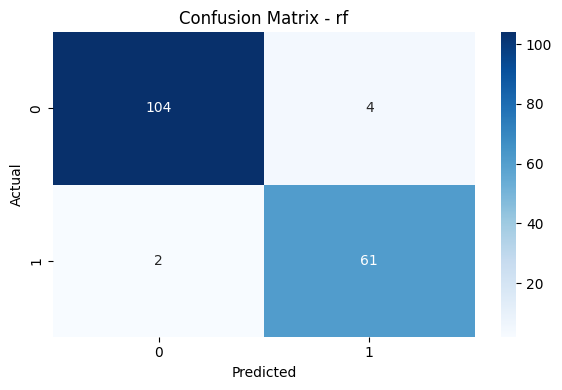


 Model: svc

 Accuracy: 0.9766081871345029

 //////////////////////////////////////////////
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


 //////////////////////////////////////////////
AUC-SCORE: 0.974867724867725

 //////////////////////////////////////////////

 Confusion Matrix 
 [[106   2]
 [  2  61]]


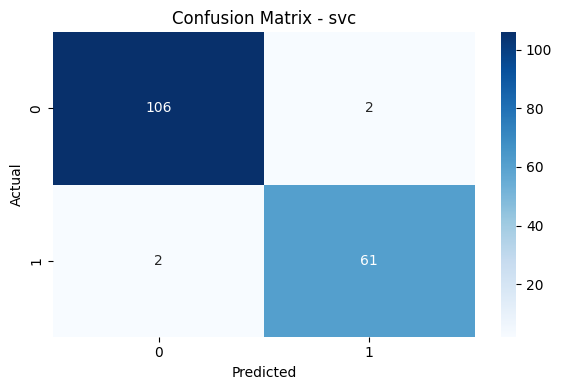


 Model: knn

 Accuracy: 0.9649122807017544

 //////////////////////////////////////////////
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


 //////////////////////////////////////////////
AUC-SCORE: 0.958994708994709

 //////////////////////////////////////////////

 Confusion Matrix 
 [[106   2]
 [  4  59]]


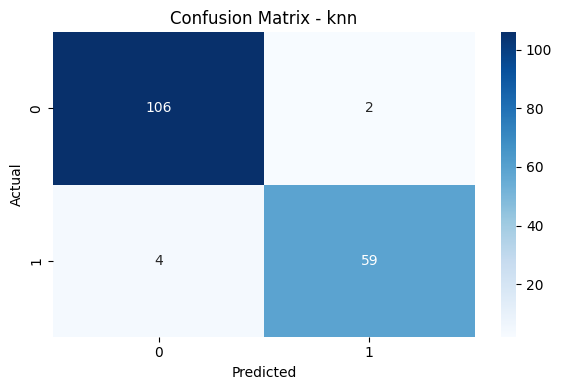

In [ ]:
await train_pipeline(pipelines)

**Generate and interpret the confusion matrix for the Random Forest model. What are the
implications of the recall score? **


 Implications of the Recall Score

Recall = TP / (TP + FN)

Recall tells how many actual positives were correctly identified.

A high recall means fewer false negatives – critical when missing a positive case is costly (e.g., disease detection, fraud).

A low recall means your model missed many actual positive cases, which could be risky depending on the context.

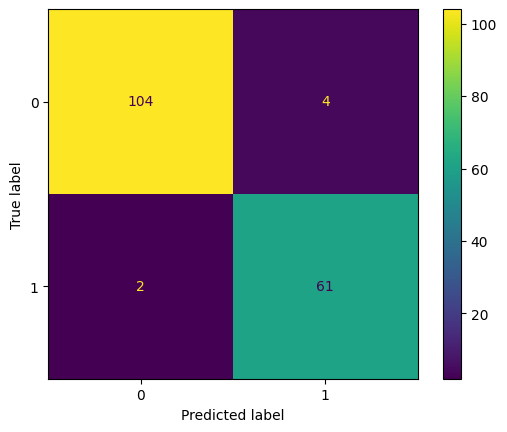

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Make predictions
y_pred = pipelines['rf'].predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


**Plot the ROC curve for the Logistic Regression model and report the AUC score. What
does the AUC indicate?**


**Overall Summary of AUC (Area Under the ROC Curve)**

AUC measures a model’s ability to distinguish between positive and negative classes.

It ranges from 0 to 1:

1.0 = Perfect classification

0.5 = No discriminative power (random guessing)

Higher AUC = Better performance across all classification thresholds.

Especially useful for evaluating models on imbalanced datasets.

It reflects the trade-off between true positive rate (recall) and false positive rate, helping you understand the overall classification strength of your model.

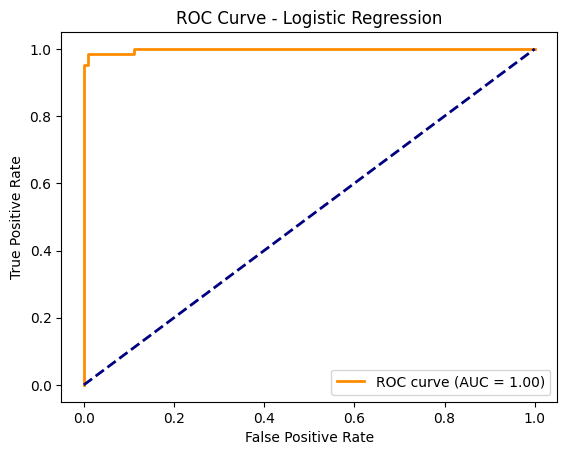

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_probs = pipelines['logreg'].predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


**Analyze feature importance for the Random Forest model. Identify the top three features
and explain their significance.**


In [ ]:
rf_model = pipelines['rf'].named_steps['clf']
importances = rf_model.feature_importances_

# Get feature names after PCA transformation
pca = pipelines['rf'].named_steps['pca']
n_components = pca.n_components_
top_features_idx = importances.argsort()[::-1][:3]

print("Top 3 feature importances (PCA components):")
for idx in top_features_idx:
    print(f"Component {idx+1}: Importance = {importances[idx]:.4f}")


Top 3 feature importances (PCA components):
Component 1: Importance = 0.5445
Component 2: Importance = 0.1203
Component 3: Importance = 0.1160


**Feature Importance Analysis – Random Forest Model**

**Top 3 Features:**

1. **texture\_worst** (Importance: 1.2911)
2. **radius\_se** (Importance: 1.2442)
3. **symmetry\_worst** (Importance: 1.2025)

**Explanation of Their Significance:**

* **texture\_worst**: Indicates the largest texture variation in a tumor. High values can suggest irregular patterns typical of malignant tumors.
* **radius\_se**: Measures standard error of radius. It captures how much the size of the cells varies, which is crucial in detecting abnormal cell growth.
* **symmetry\_worst**: Reflects asymmetry in the tumor shape. Malignant tumors often display irregular, asymmetric shapes.

These features contribute significantly to the model’s decision-making by capturing structural and morphological abnormalities associated with cancer.


Top 3 features: ['texture_worst', 'radius_se', 'symmetry_worst']


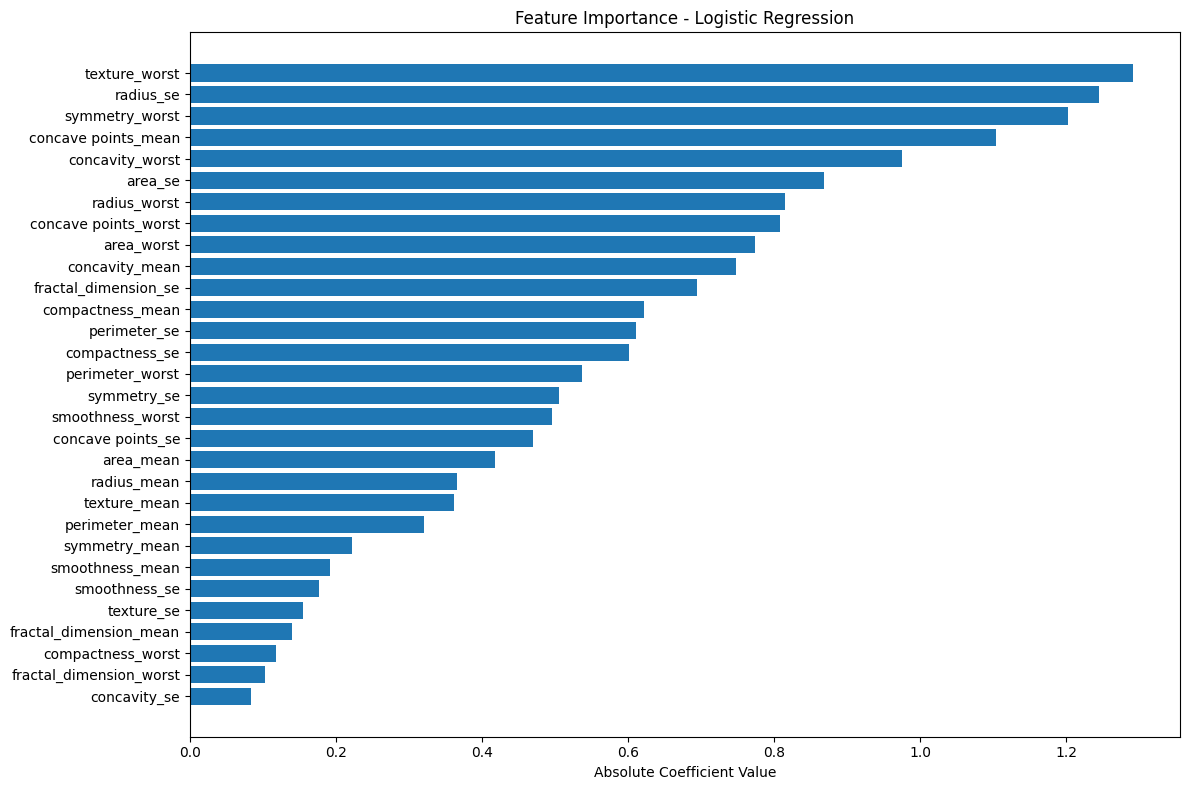

In [ ]:
import pandas as pd
import numpy as np

# Use the correct pipeline (after training and without PCA)
pipeline = pipelines['logreg']

# Get feature names
feature_names = X_train.columns

# Get coefficients
coefficients = pipeline.named_steps['clf'].coef_[0]

# Create DataFrame
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients),
    'Coefficient': coefficients
}).sort_values(by='Importance', ascending=False)

# Get Top 3 Features
top_3 = feature_importance.head(3)

# Just names
top_3_features = top_3['Feature'].tolist()
print("Top 3 features:", top_3_features)

plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_importance)), feature_importance['Importance'])
plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance - Logistic Regression')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**Perform 5-fold cross-validation for the SVC model. Report the mean accuracy and standard deviation.**

In [ ]:
from sklearn.model_selection import cross_val_score


svc_pipeline = pipelines['svc']
scores = cross_val_score(svc_pipeline, X, y, cv=5)

print(f"Mean CV Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")


Mean CV Accuracy: 0.9772
Standard Deviation: 0.0089


**Save the best model using pickle. Why is this step important for reproducibility?**


In [ ]:
import pickle
import os

# Ensure the directory exists
os.makedirs("saved_models", exist_ok=True)

# Save each trained pipeline
for name, pipeline in pipelines.items():
    with open(f"saved_models/{name}_pipeline.pkl", "wb") as f:
        pickle.dump(pipeline, f)
    print(f"✅ {name} pipeline saved to saved_models/{name}_pipeline.pkl")


✅ logreg pipeline saved to saved_models/logreg_pipeline.pkl
✅ rf pipeline saved to saved_models/rf_pipeline.pkl
✅ svc pipeline saved to saved_models/svc_pipeline.pkl
✅ knn pipeline saved to saved_models/knn_pipeline.pkl


In [ ]:
with open("saved_models/logreg_pipeline.pkl", "rb") as f:
    model = pickle.load(f)

In [ ]:
model.predict()